In [75]:
import sys
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# getcwd - current working directory, joining to .. which symbolizes one file up
# abspath - removes all the .. etc
parent_dir = os.path.abspath(os.path.join(os.getcwd(),'..'))
if parent_dir not in sys.path:
    sys.path.insert(0,parent_dir)
    
from common_utils import EDA

In [76]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_final = pd.read_csv('data/sample_submission.csv')

In [77]:
# Dataset Overview
num_cols, cat_cols = EDA.dataset_overview(df)

==================================== Dataset Overview ====================================

============ Data Shape ============
Rows: 18524
Columns: 9


============ Datatypes ============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB
============ Missing Val

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64



============ Duplicates Values ============
Duplicated values : 0
============ Data Preview ============
Head:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert


Tail:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert
18523,18523,1.0,No,8.0,6.0,No,4.0,7.0,Extrovert


Sample:


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
3931,3931,5.0,Yes,0.0,1.0,Yes,4.0,0.0,Introvert
5051,5051,0.0,No,4.0,NaN,No,8.0,8.0,Extrovert
13218,13218,1.0,No,6.0,5.0,NaN,6.0,5.0,Extrovert




============ Numerical and Categorical Values ============
Numerical Datatypes: Index(['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')
Number of numeric features: 6
Categorical Datatypes: Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')
Number of categorical features: 3


# Observations
1. There are missing values
2. There are 5 numerical features, 1 id, 2 categorical and a categorical target
3. No duplicates

In [78]:
num_cols = num_cols.drop('id')

****************************** Stage_fear analysis ******************************
Number of Unique Stage_fear values: 2


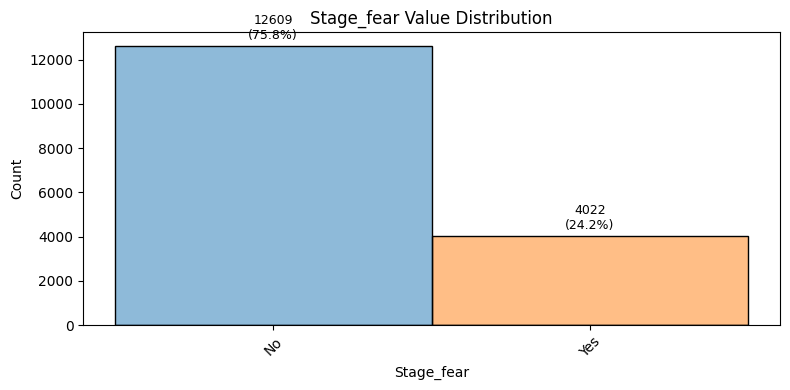





****************************** Drained_after_socializing analysis ******************************
Number of Unique Drained_after_socializing values: 2


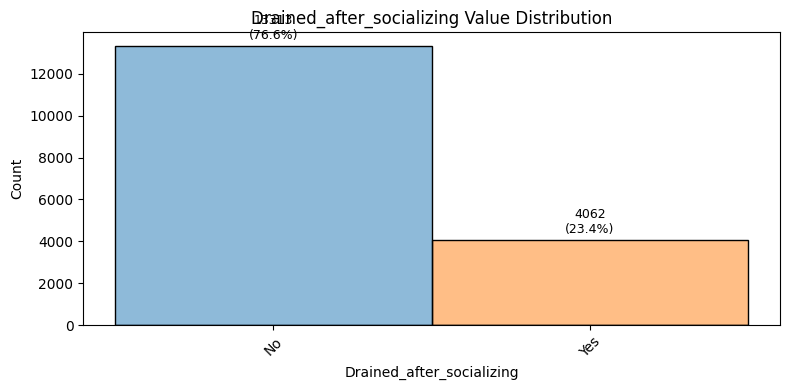





****************************** Personality analysis ******************************
Number of Unique Personality values: 2


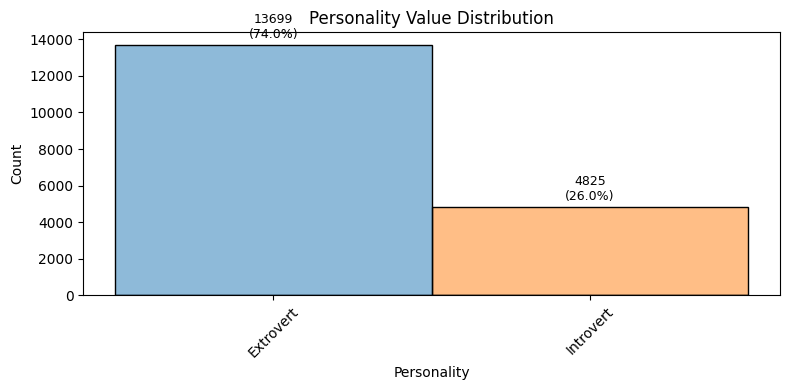

In [79]:
for col in cat_cols:
    EDA.categorical_analysis(df,col)

# Observations
1. There are a disproportionate number of extroverts to introverts
2. Also likely to be a strong relationship between categorical values and whether or not they are an extrovert

****************************** Time_spent_Alone analysis ******************************


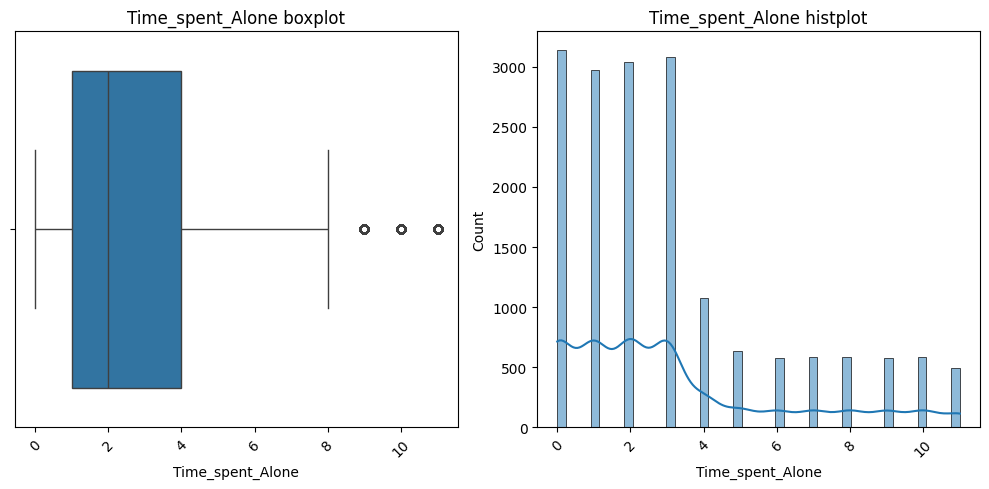

********************  Time_spent_Alone values description  ********************


,Time_spent_Alone
count,17334.000000
mean,3.137764
std,3.003786
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,11.000000


********************  Time_spent_Alone outliers  ********************
IQR : 3.0
****** Upper Outliers ******
Upper outlier count: 1653


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
25,25,9.0,Yes,1.0,3.0,Yes,7.0,5.0,Introvert
27,27,9.0,NaN,0.0,0.0,Yes,1.0,1.0,Introvert
44,44,9.0,Yes,1.0,0.0,Yes,3.0,0.0,Introvert






****************************** Social_event_attendance analysis ******************************


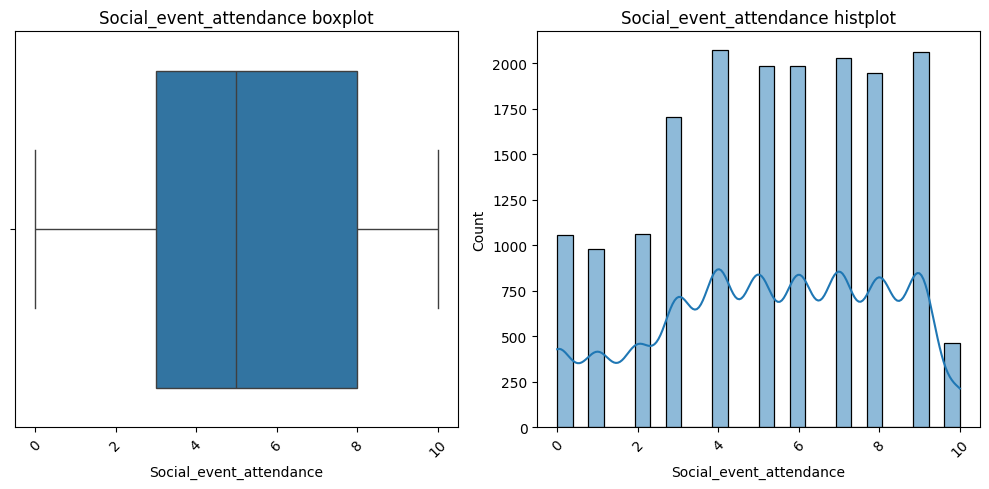

********************  Social_event_attendance values description  ********************


,Social_event_attendance
count,17344.000000
mean,5.265106
std,2.753359
min,0.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,10.000000


********************  Social_event_attendance outliers  ********************
IQR : 5.0




****************************** Going_outside analysis ******************************


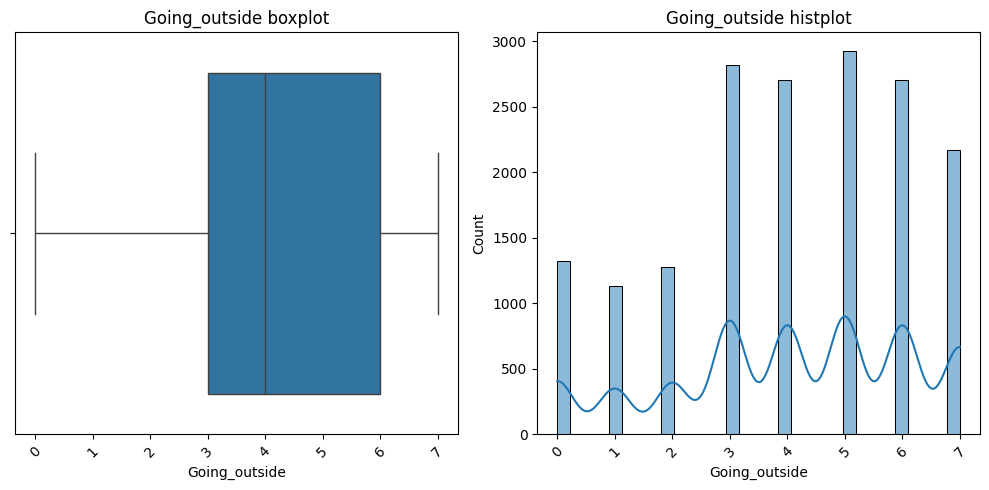

********************  Going_outside values description  ********************


,Going_outside
count,17058.000000
mean,4.044319
std,2.062580
min,0.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,7.000000


********************  Going_outside outliers  ********************
IQR : 3.0




****************************** Friends_circle_size analysis ******************************


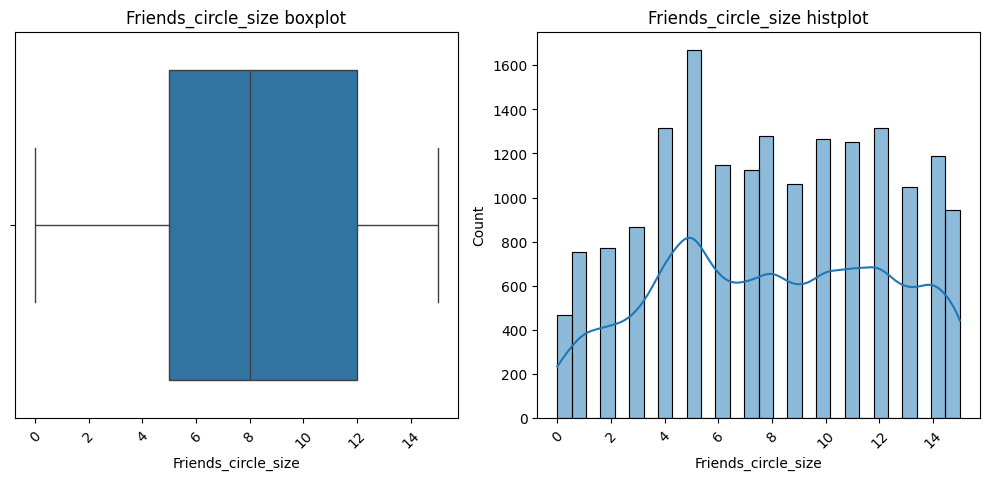

********************  Friends_circle_size values description  ********************


,Friends_circle_size
count,17470.000000
mean,7.996737
std,4.223484
min,0.000000
25%,5.000000
50%,8.000000
75%,12.000000
max,15.000000


********************  Friends_circle_size outliers  ********************
IQR : 7.0




****************************** Post_frequency analysis ******************************


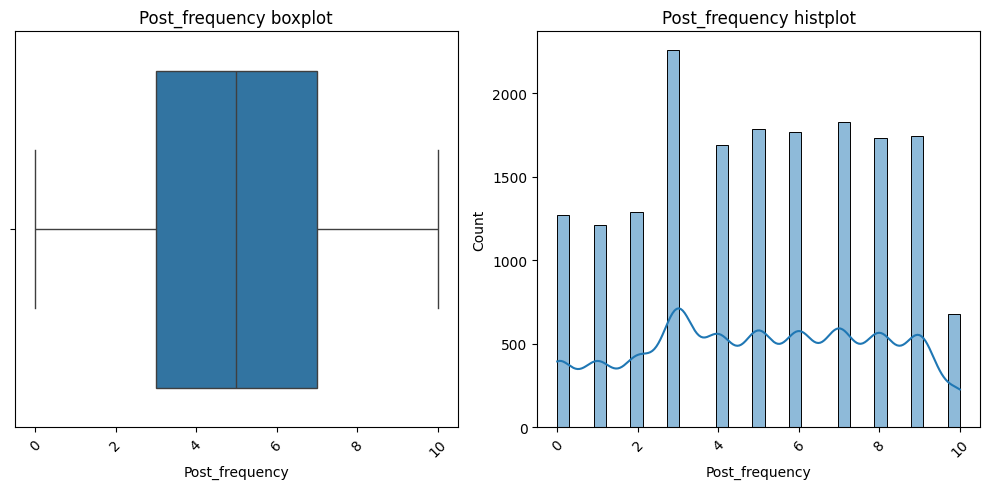

********************  Post_frequency values description  ********************


,Post_frequency
count,17260.000000
mean,4.982097
std,2.879139
min,0.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,10.000000


********************  Post_frequency outliers  ********************
IQR : 4.0






In [80]:
for col in num_cols:
    EDA.num_analysis(df,col)

# Observations
1. Uniform distribution for the most part
2. Outliers make sense, unlikely that they need to be removed

# Missing values

In [81]:
import missingno as msno

In [82]:
df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

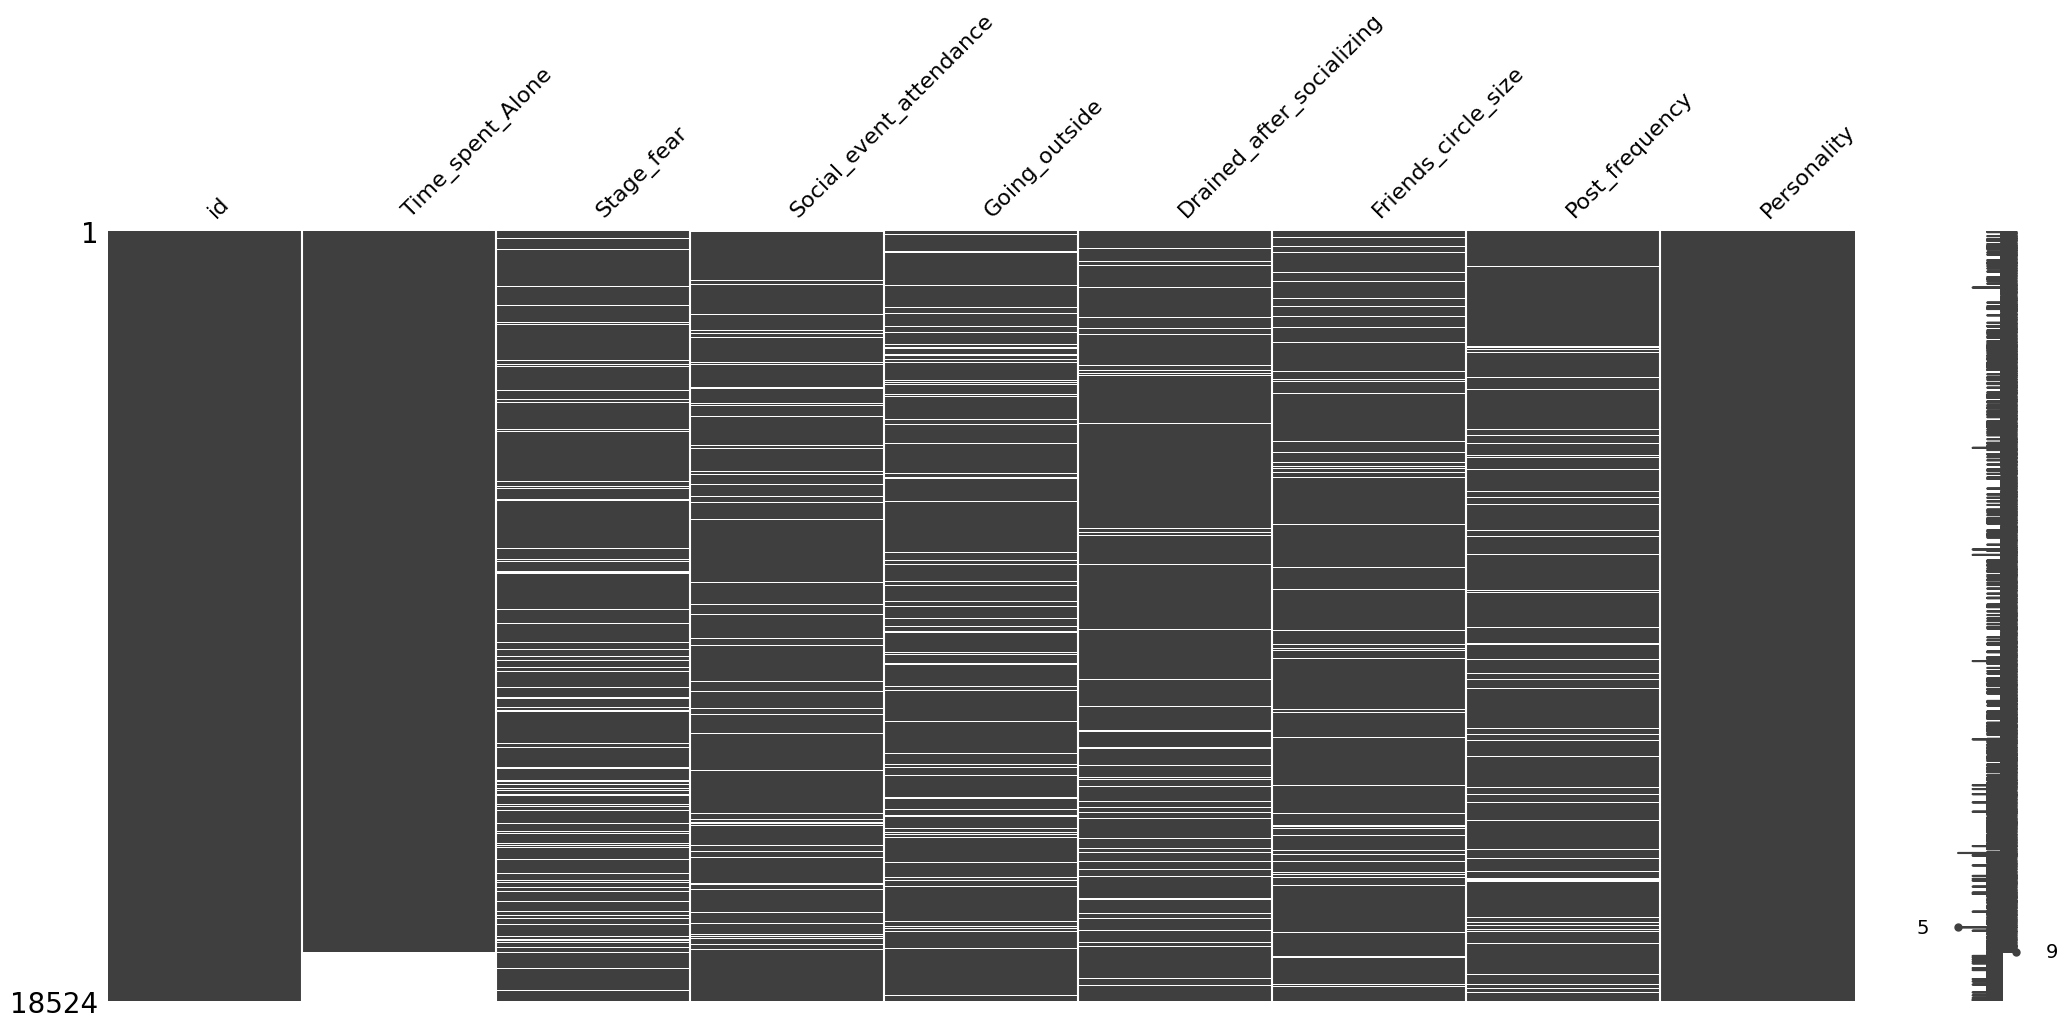

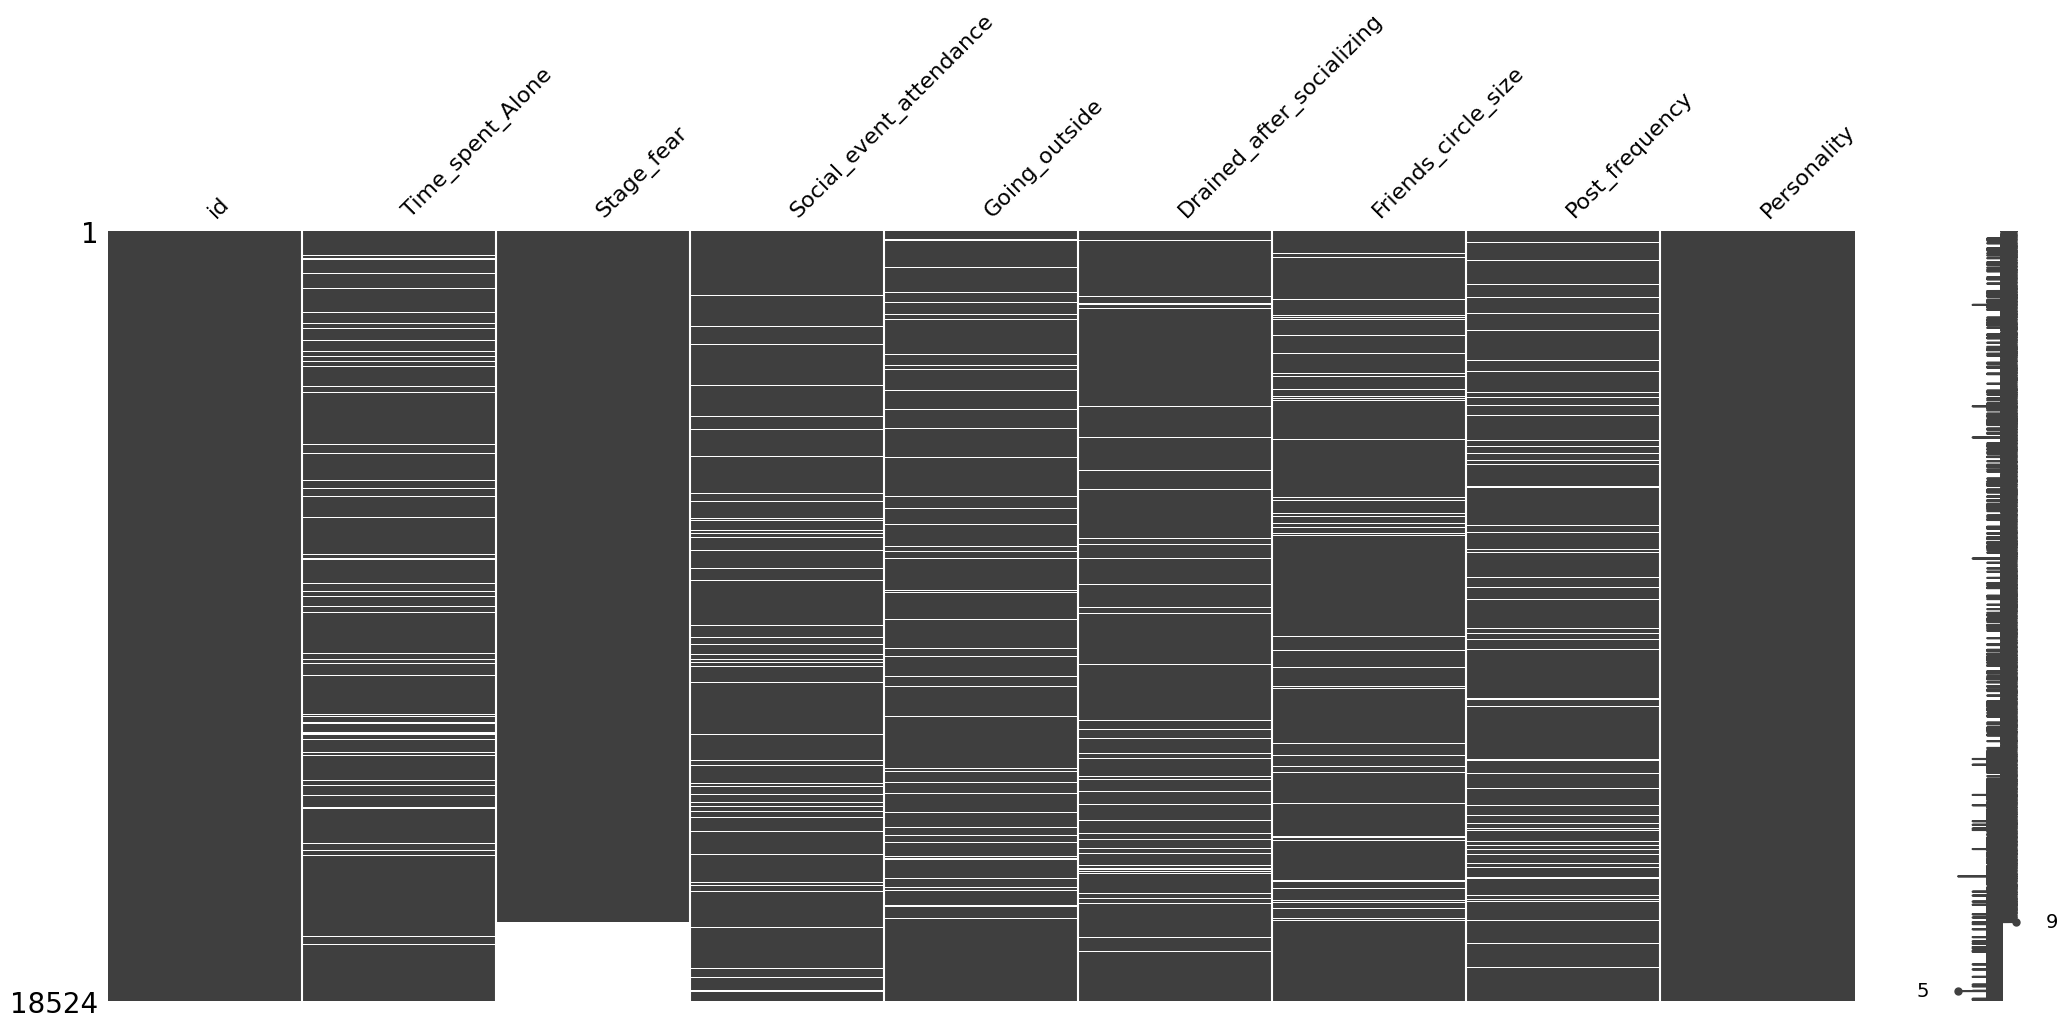

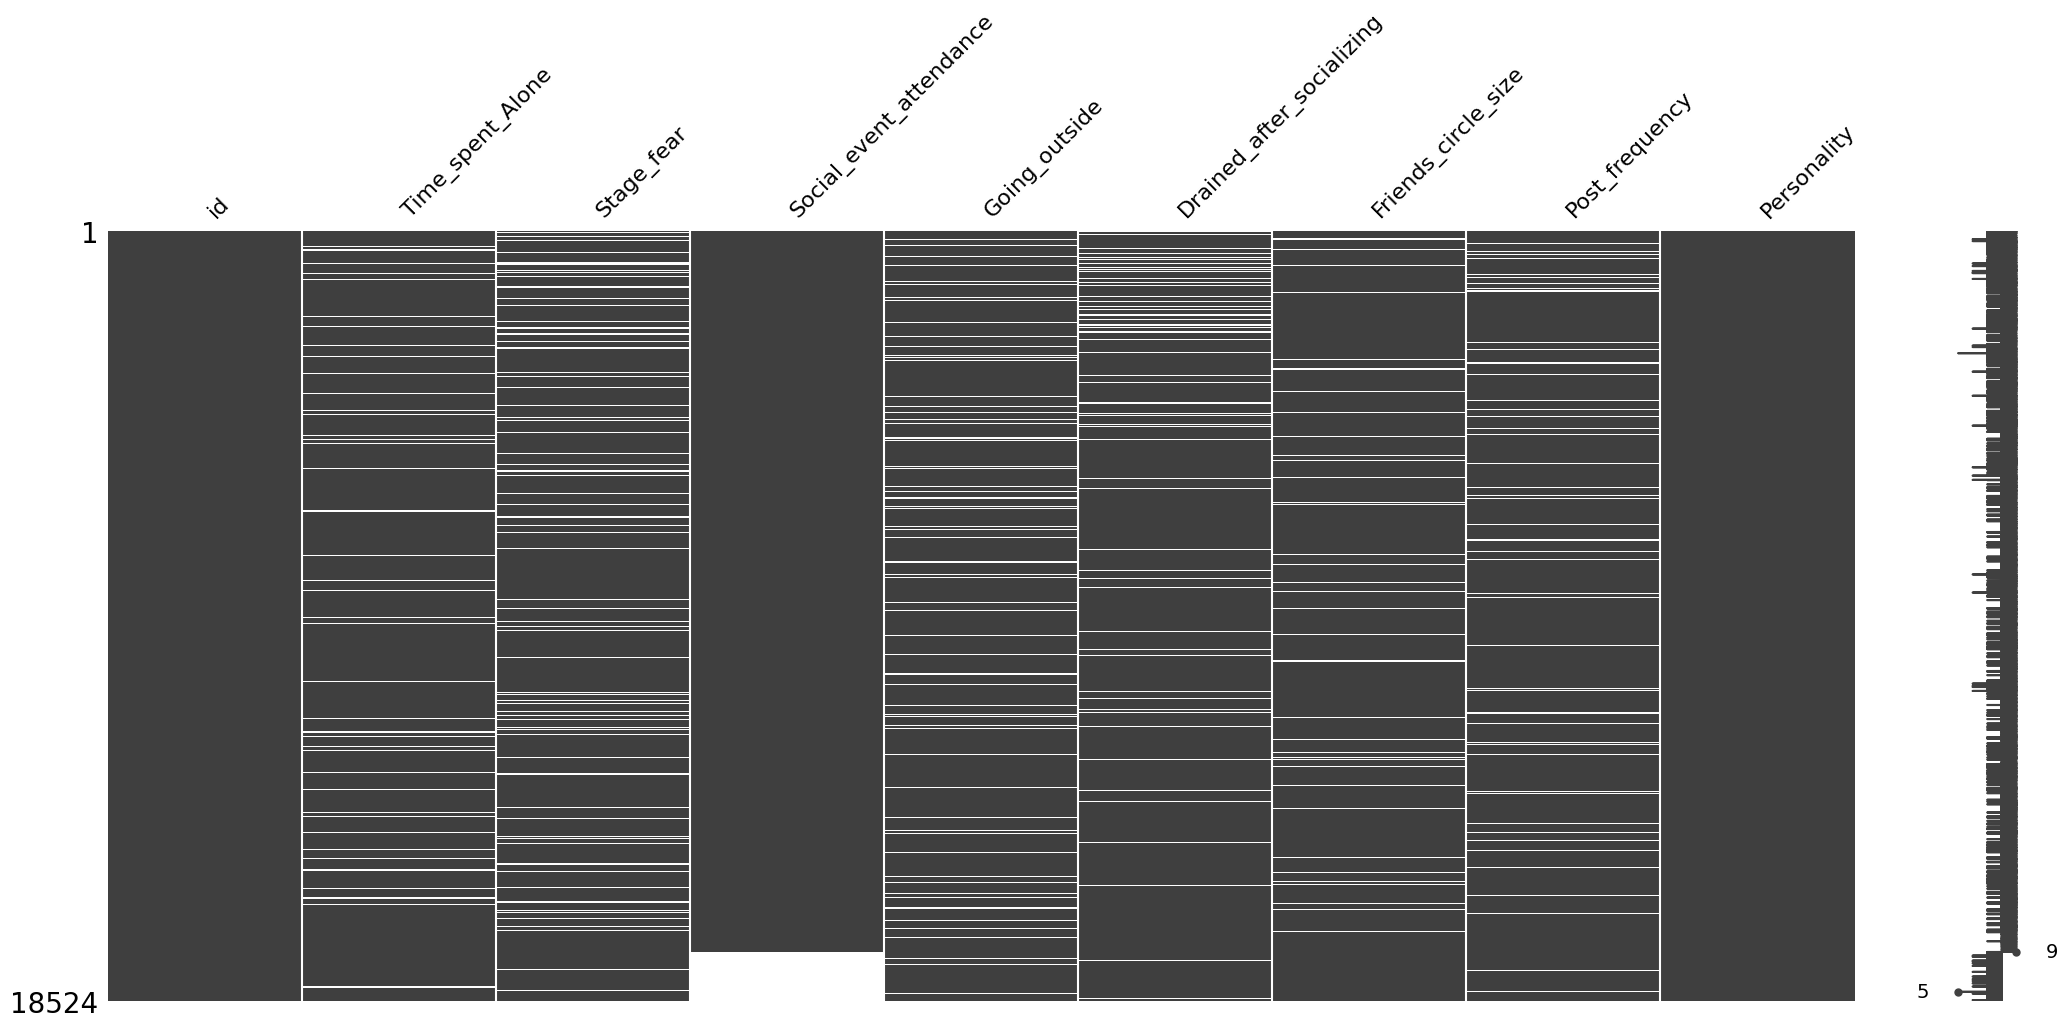

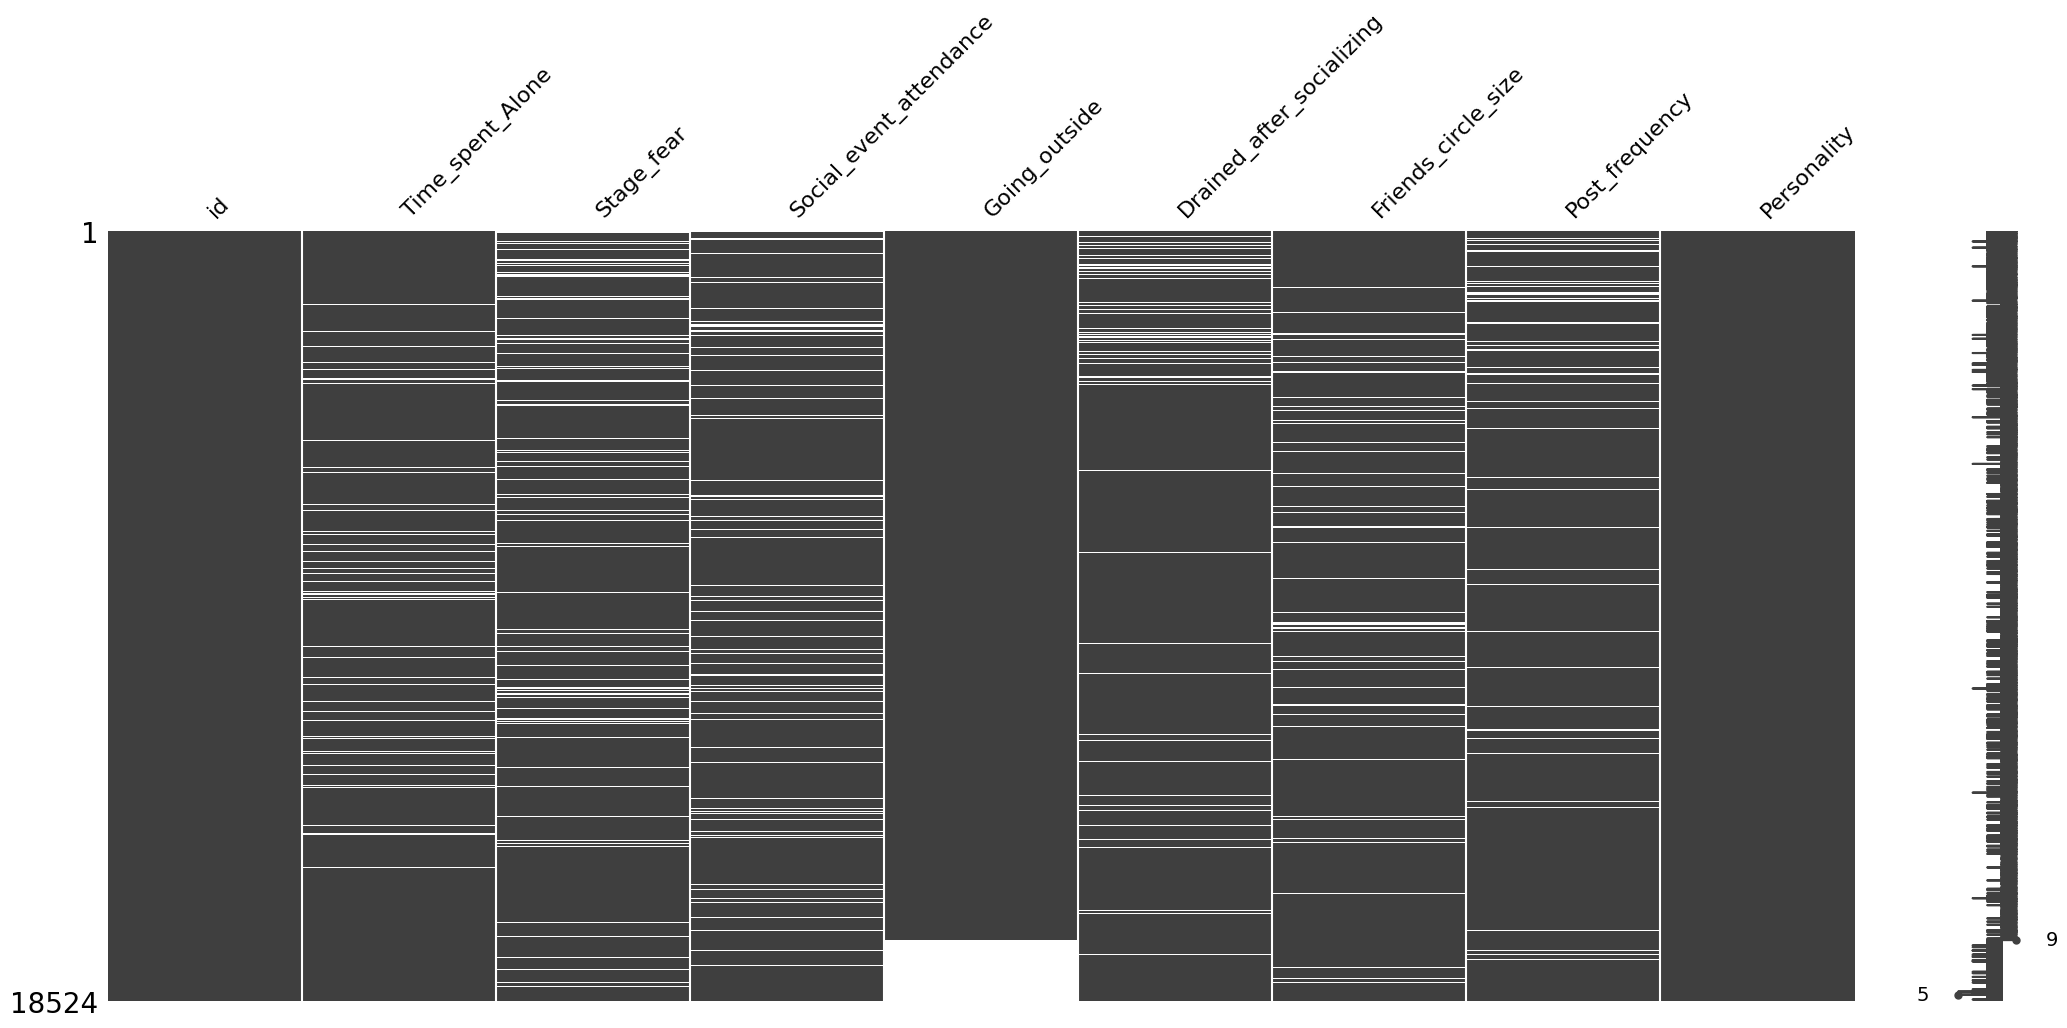

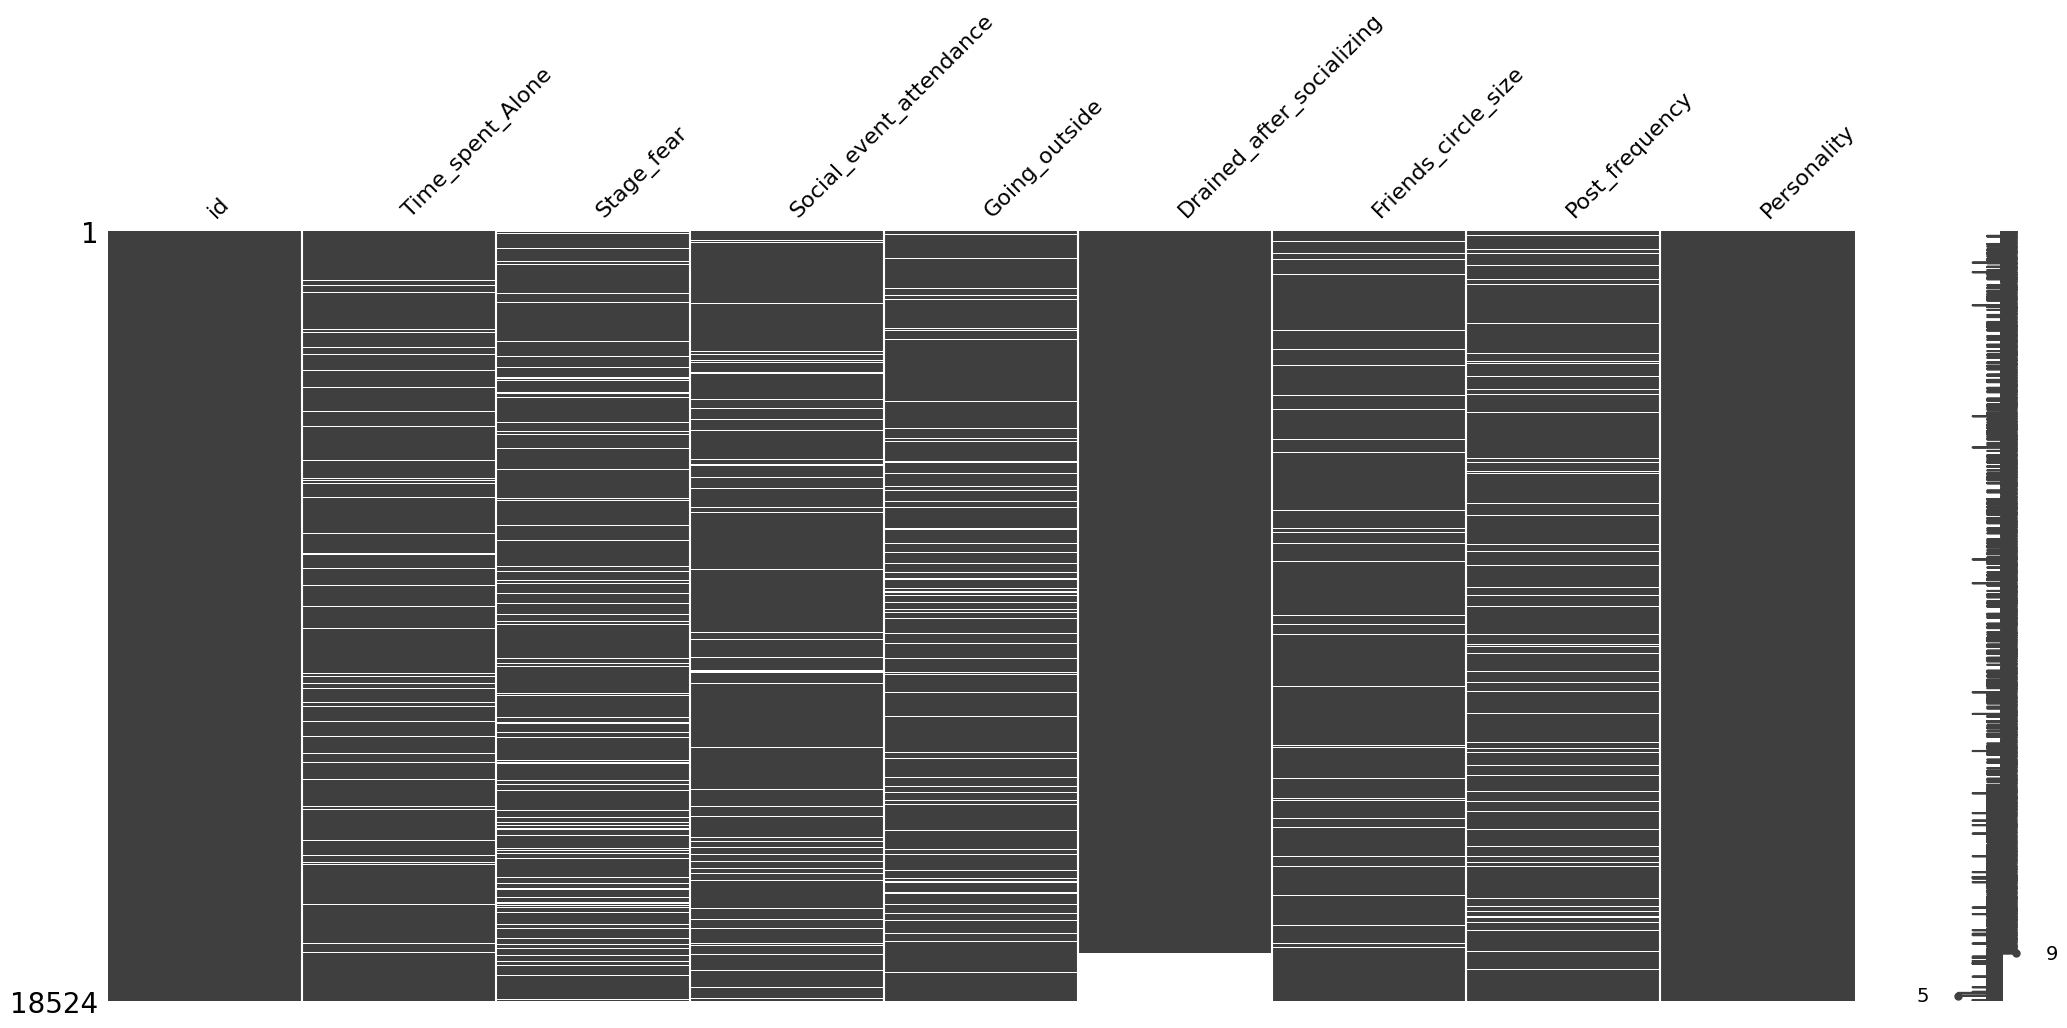

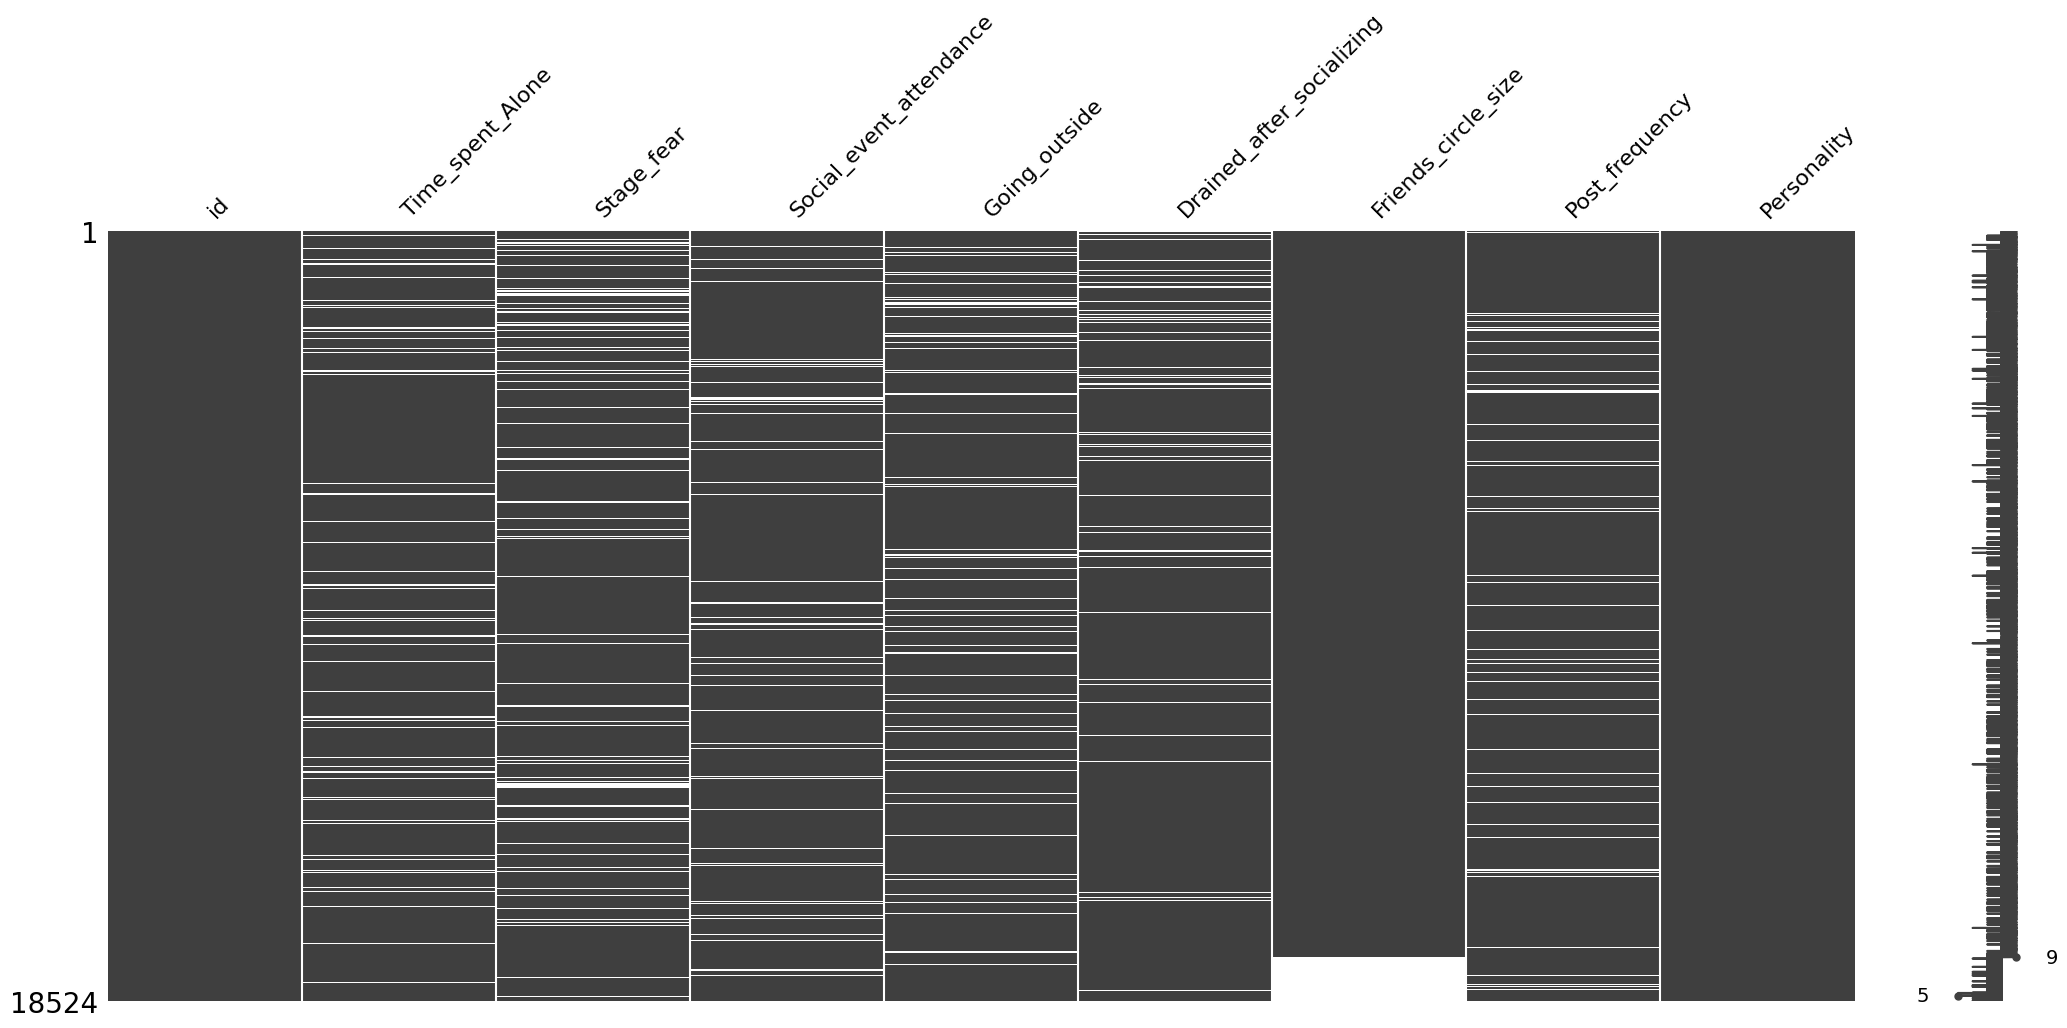

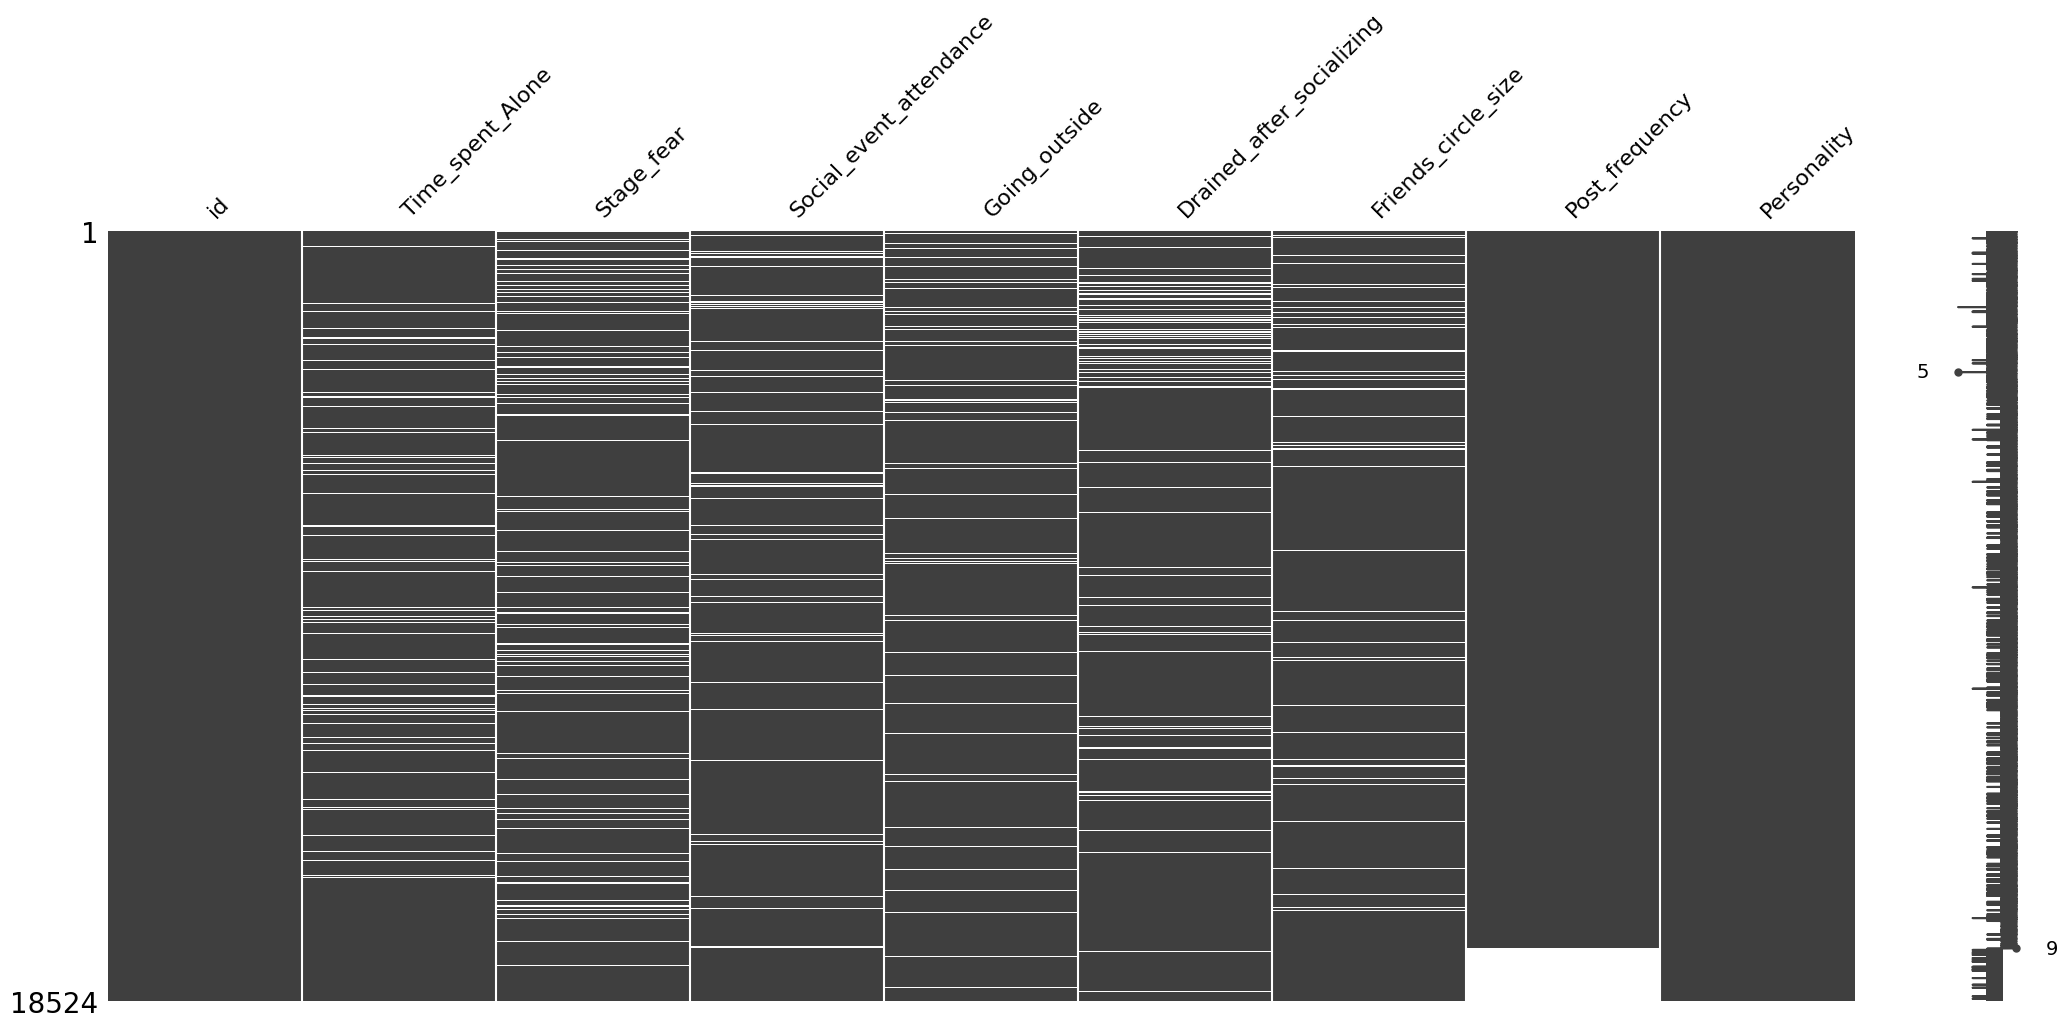

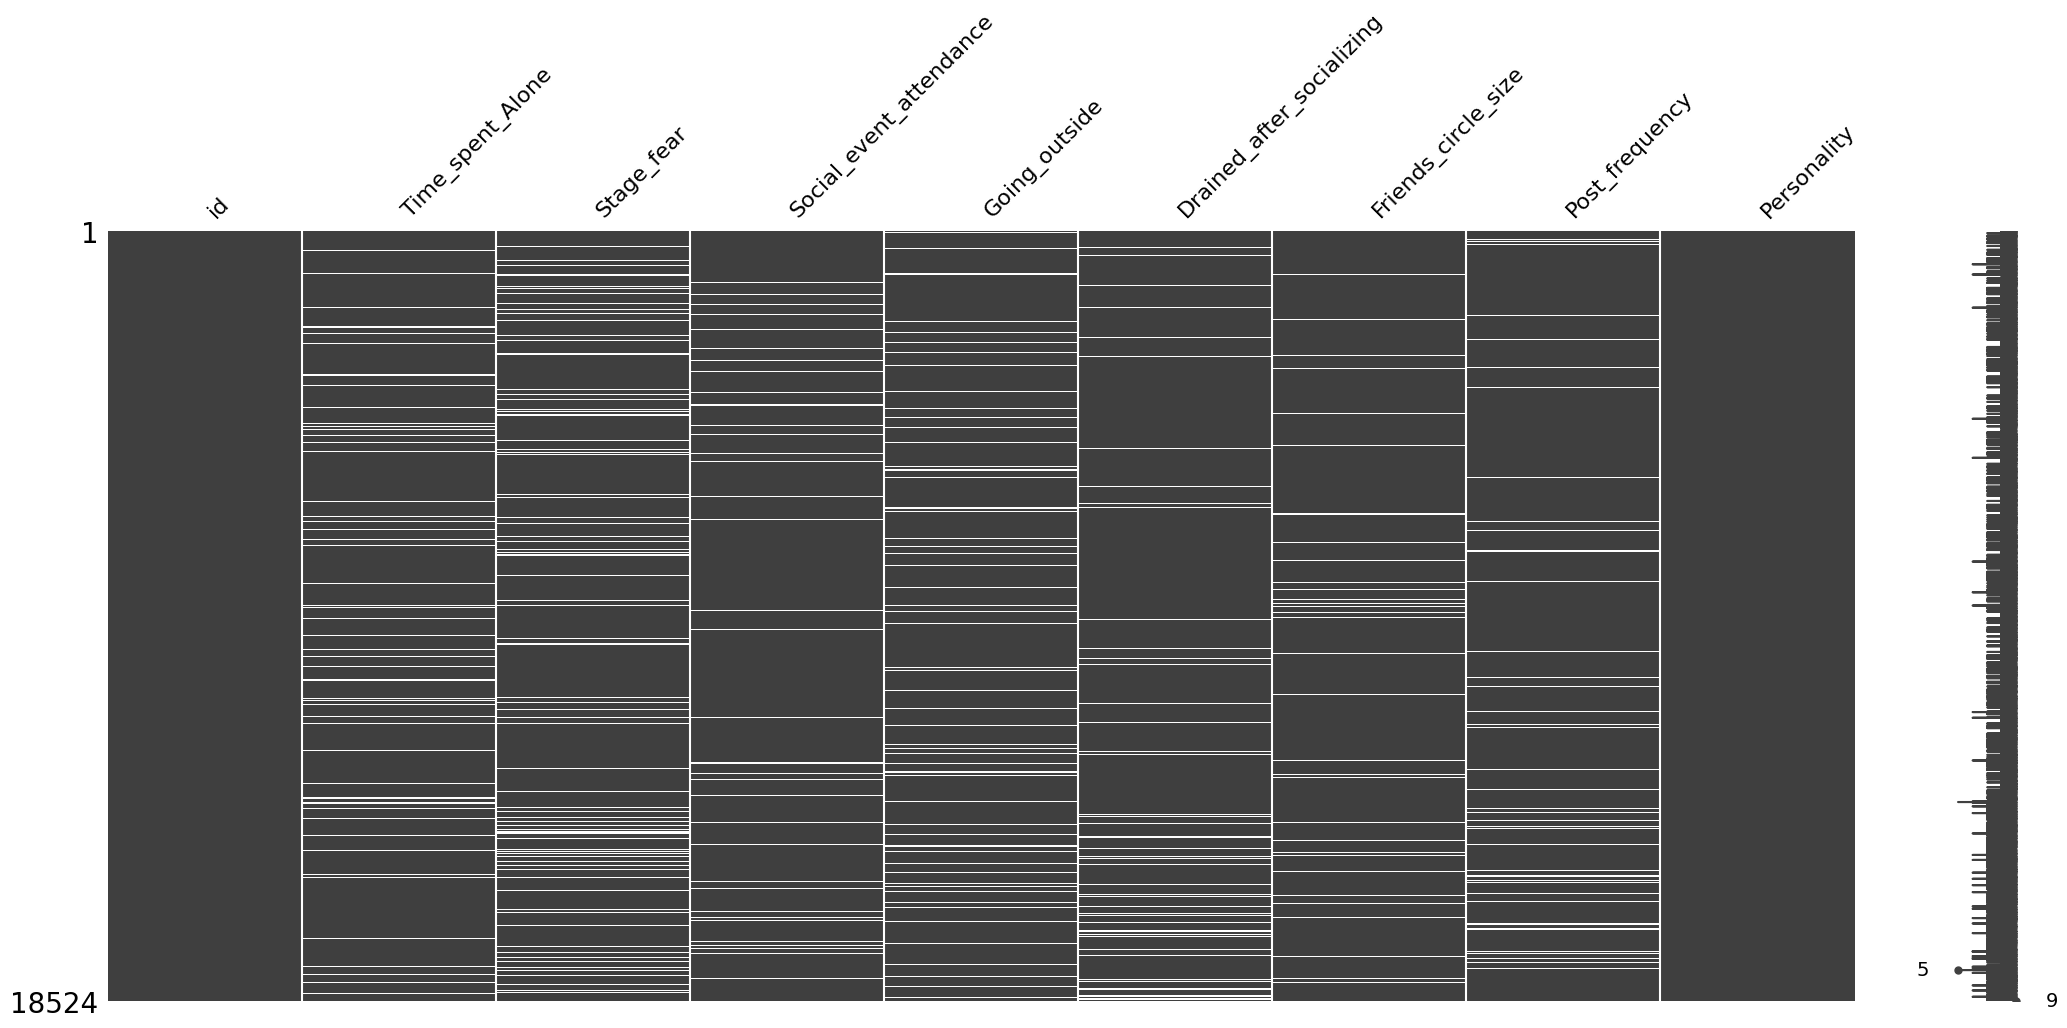

In [83]:
for col in df.columns.drop('id'):
    df_sort = df.sort_values(col)
    msno.matrix(df_sort)

In [84]:
missing_values_pct = df.isnull().any(axis=1).mean()*100
missing_values_pct

44.99568127834161

# Observations
1. Seems to be MCAR
2. There are too many rows with missing data, therefore need to impute
3. Impute median as numeric data is not symmetrical
4. For categorical, impute unknown 

# Correlation

<Axes: >

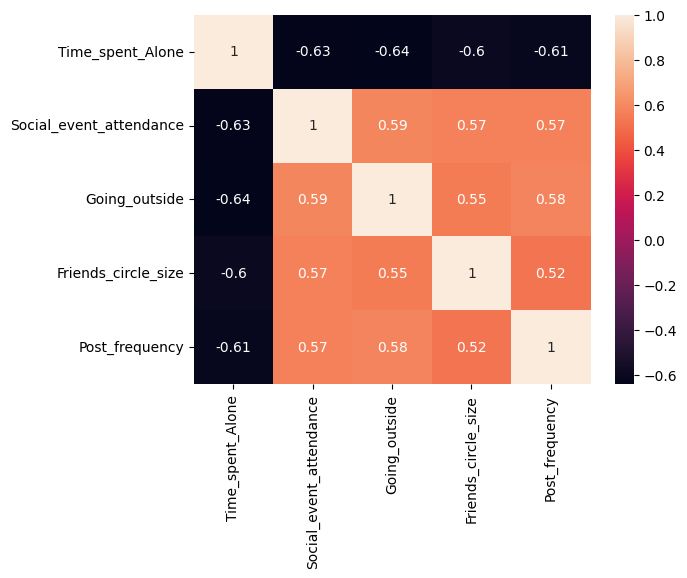

In [85]:
df_corr = df[num_cols].corr()

sns.heatmap(df_corr, annot=True)

In [86]:
num_cols

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

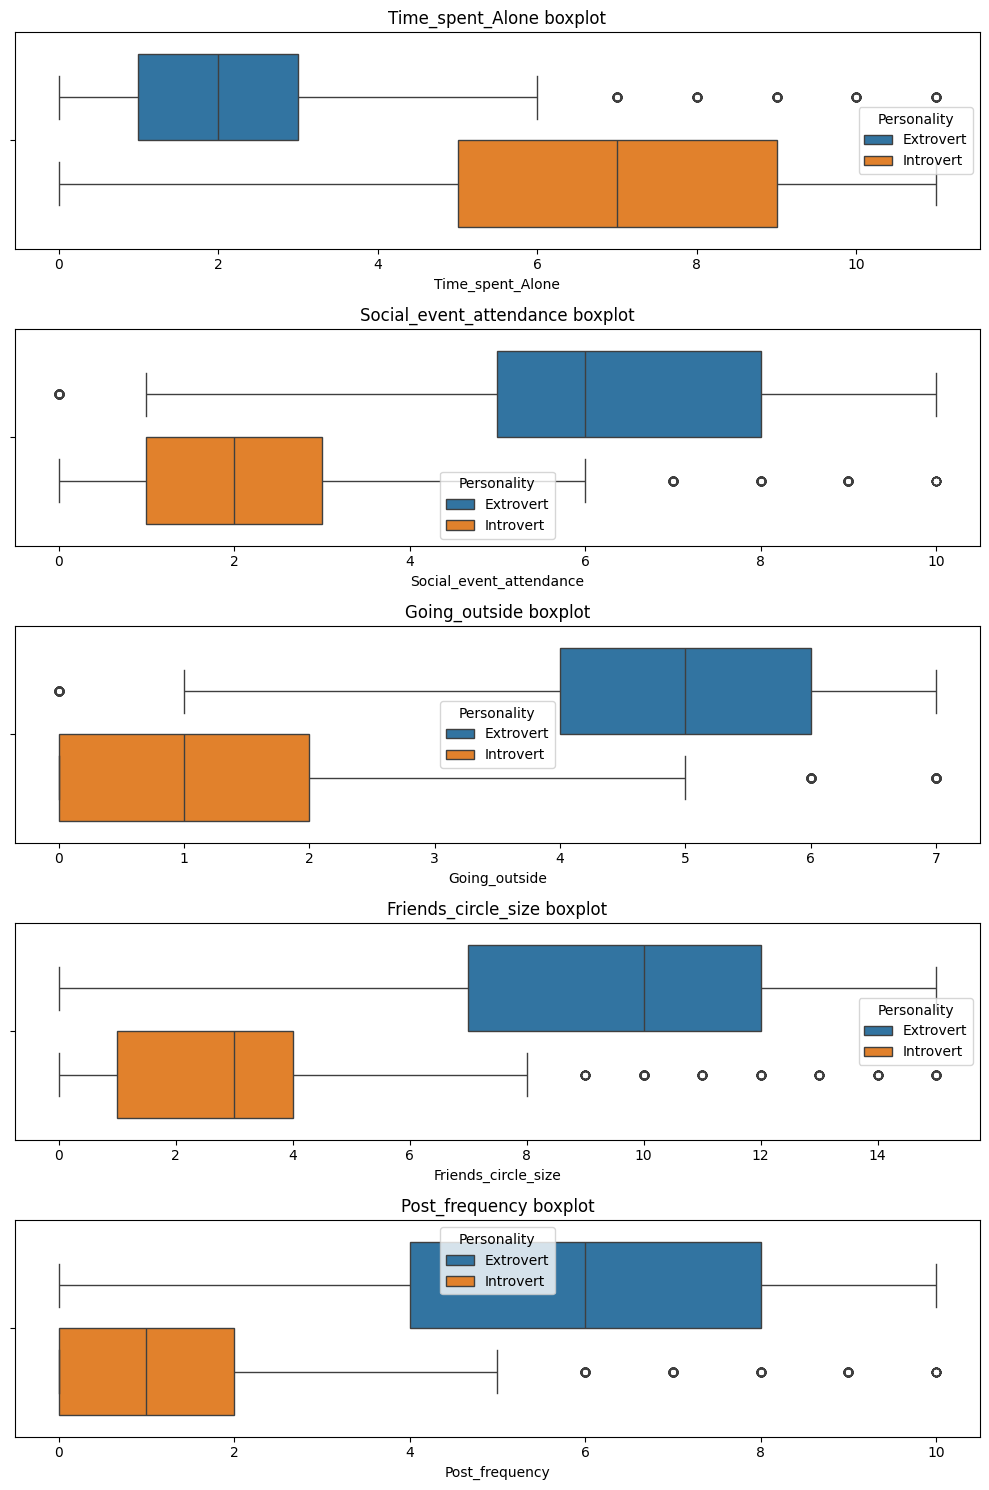

In [87]:
# How do introverts and extroverts differ in their social activities?

fig,axs = plt.subplots(nrows=len(num_cols),ncols=1,figsize=(10,3*len(num_cols)))
for i,col in enumerate(num_cols):
    axs[i].set_title(f'{col} boxplot')
    sns.boxplot(df,x=col, hue='Personality', ax=axs[i])
plt.tight_layout()
plt.show()

In [88]:
df.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [89]:
cat_cols

Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')

In [90]:
# Model selection
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    FunctionTransformer,
    LabelEncoder
)

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    average_precision_score,
    label_ranking_average_precision_score,
    roc_auc_score,
    make_scorer
)

# ML libraries
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

# Hyperparameter tuning
import optuna

# Steps:
1. Create preprocessor for logistic regression model
2. Create preprocessor for lgbm
3. Create preprocessor for rf
4. Create model and use in an ensemble

In [91]:
X = df.drop(columns=['Personality'])
y = df['Personality']

encoder = LabelEncoder()

y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [ ]:
best_lgbm_params = {'n_estimators': 900, 'learning_rate': 0.169919944446412, 'max_depth': 2, 'lambda_l2': 1, 'verbosity':-1}

In [112]:
# Define models

model_rf = RandomForestClassifier()
model_lgbm = LGBMClassifier(**best_lgbm_params)
model_log_reg = LogisticRegression()


In [113]:
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

In [114]:
num_pipeline_rf = Pipeline(steps = [
    ('num_impute',SimpleImputer(strategy='median'))
])

cat_pipeline_rf = Pipeline(steps = [
    ('cat_impute',SimpleImputer(strategy='constant',fill_value='unknown')),
    ('onehot',OneHotEncoder())
])
rf_preprocessor = ColumnTransformer(transformers = [
    ('num',num_pipeline_rf,num_cols),
    ('cat',cat_pipeline_rf,cat_cols)
], remainder = 'passthrough')

rf_pipeline = Pipeline(steps = [
    ('preprocessor',rf_preprocessor),
    ('model',model_rf)
])

In [115]:
num_pipeline_lgbm = Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='median'))
])

cat_pipeline_lgbm = Pipeline(steps=[
    ('cat_impute',SimpleImputer(strategy='constant',fill_value='unknown')),
    ('onehot',OneHotEncoder())
])
lgbm_preprocessor = ColumnTransformer(transformers = [
    ('num', num_pipeline_lgbm, num_cols),
    ('cat',cat_pipeline_lgbm,cat_cols),
], remainder = 'passthrough')

lgbm_pipeline = Pipeline(steps = [
    ('preprocessor',lgbm_preprocessor),
    ('model',model_lgbm)
])

In [116]:
num_pipeline_logreg = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline_logreg = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

logreg_preprocessor = ColumnTransformer([
    ('num', num_pipeline_logreg, num_cols),
    ('cat', cat_pipeline_logreg, cat_cols)
], remainder='passthrough')

logreg_pipeline = Pipeline([
    ('preprocessor', logreg_preprocessor),
    ('model', model_log_reg)
])


In [117]:
def estimator_results(estimator, X_train,X_test,y_train,y_test):
    estimator.fit(X_train,y_train)
    y_preds = estimator.predict(X_test)
    accuracy = accuracy_score(y_preds,y_test)
    print(accuracy)

In [118]:
for estimator in [logreg_pipeline,lgbm_pipeline,rf_pipeline,ensemble]:
    estimator_results(estimator, X_train,X_test,y_train,y_test)

0.9681540122346167
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

c:\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.9677941705649514


c:\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

c:\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
